In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def funcform():
    a = 2.6
    b = 1.8
    c = 3.6
    p = [[a, 0, 0], [0, b, 0], [0, 0, c]]
    return p


# Define the Lorenz system
def lorenz_system(t, state, sigma, rho, beta, coupling):
    x, y, z, u, v, w = state
    p = funcform()
    
    dx_dt = sigma * (y - x) + coupling *sigma* (v/p[0][0])
    dy_dt = x * (rho - z) - y  + coupling * (rho*u-u*w)/p[1][1]
    dz_dt = x * y - beta * z + coupling * (u*v)/p[2][2]
    
    du_dt = sigma * (v - u) + coupling *sigma* (p[0][0]*y)
    dv_dt = u * (rho - w) - v + coupling * (rho*x - x*z)*p[1][1]
    dw_dt = u * v - beta * w + coupling * (x*y)*p[2][2]
    
    return [dx_dt, dy_dt, dz_dt, du_dt, dv_dt, dw_dt]

# Set the parameters
sigma = 10
rho = 28
beta = 8/3
coupling = 1


# Set the initial conditions
initial_state = [1, 0, 0, 2, 10, 0]

# Set the time span for integration
t_start = 0
t_end = 100
t_step = 0.001
t_span = np.arange(t_start, t_end, t_step)

# Solve the coupled Lorenz systems
solution = solve_ivp(lorenz_system, [t_start, t_end], initial_state, t_eval=t_span, args=(sigma, rho, beta, coupling))

# Extract the states of the two Lorenz systems
x1 = solution.y[0]
y1 = solution.y[1]
z1 = solution.y[2]
x2 = solution.y[3]
y2 = solution.y[4]
z2 = solution.y[5]

Text(0.5, 0.92, '3D Surface Plot')

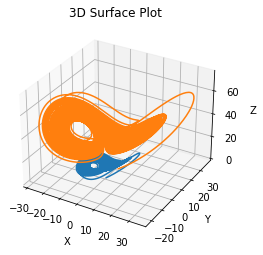

In [2]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot surface
ax.plot3D(x1, y1, z1)
ax.plot3D(x2, y2, z2)

#ax.plot_surface(x2, y2, z2, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')
